#**Machine learning project**
##### Pridicting MRSP (manufactuer's suggested retail price)
# By : Eng. Ayman Attili


###<font color = 'blue'>The libraries that we need </font>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



###<font color = 'blue'>Get the data and look at the big picture </font> 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/cars.csv')

In [ ]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
lis = ['Make','Model','Engine Fuel Type',  'Transmission Type', 'Driven_Wheels',  'Market Category', 'Vehicle Size', 'Vehicle Style']
for i in lis:
  print(i,'\n',data[i].value_counts())
  print('-'*10)

Make 
 Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spy

In [ ]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### <font color = 'blue'>**Visualization**</font> 


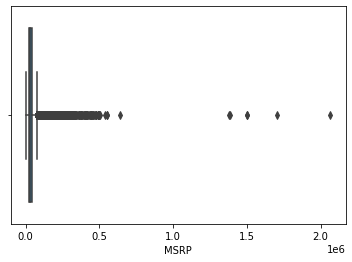

In [ ]:
sns.boxplot(data['MSRP'])

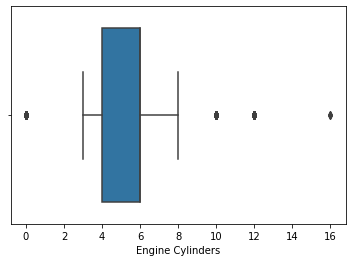

In [ ]:
sns.boxplot(data['Engine Cylinders'])

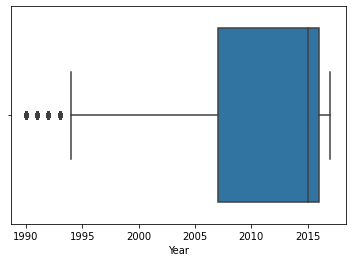

In [ ]:
sns.boxplot(data['Year'])

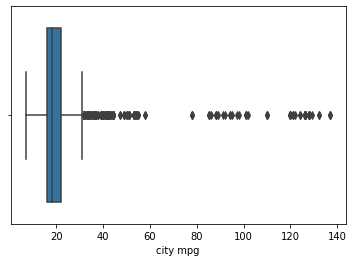

In [ ]:
sns.boxplot(data['city mpg'])

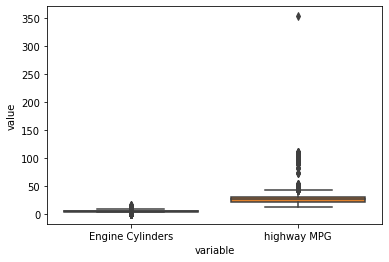

In [ ]:
df0 = pd.DataFrame(data = data, columns = ['Engine Cylinders','highway MPG'])

sns.boxplot(x="variable", y="value", data=pd.melt(df0))

plt.show()

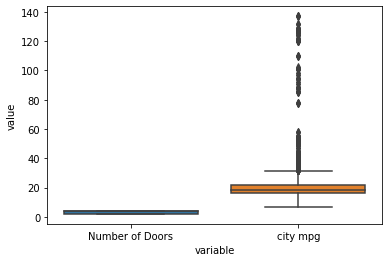

In [ ]:
df1 = pd.DataFrame(data = data, columns = ['Number of Doors',	'city mpg',])

sns.boxplot(x="variable", y="value", data=pd.melt(df1))

plt.show()

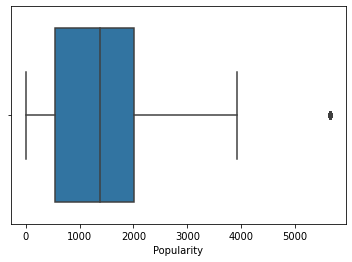

In [ ]:
sns.boxplot(data['Popularity'])

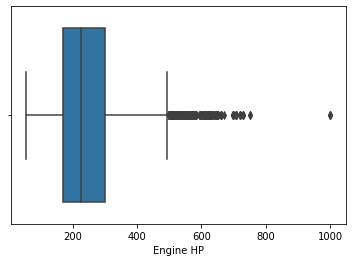

In [ ]:
sns.boxplot(data['Engine HP' ])

In [ ]:
num_col = list(data.dtypes[data.dtypes != 'object'].index)


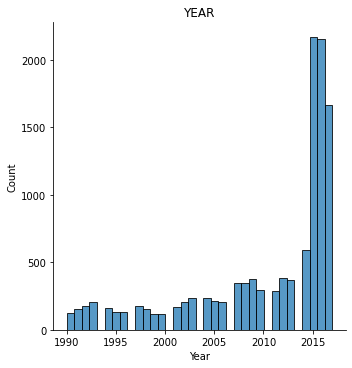

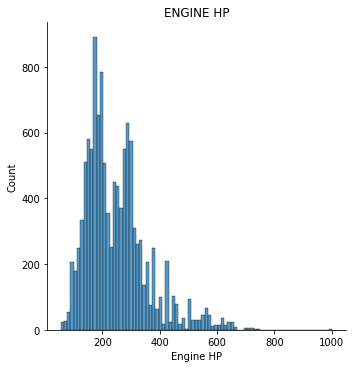

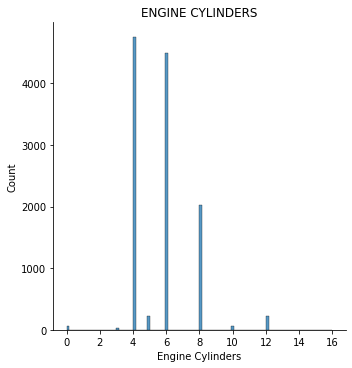

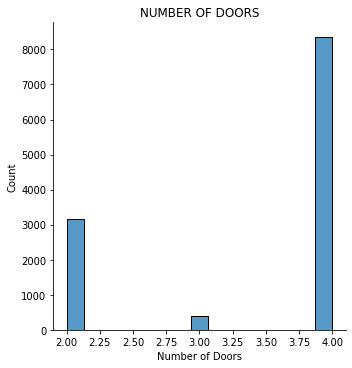

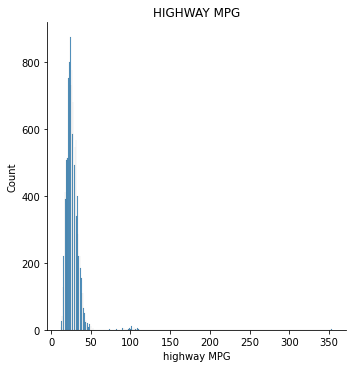

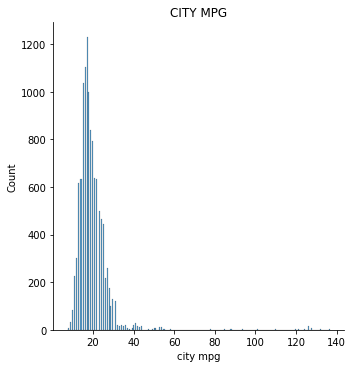

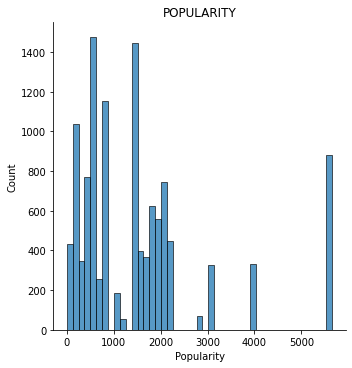

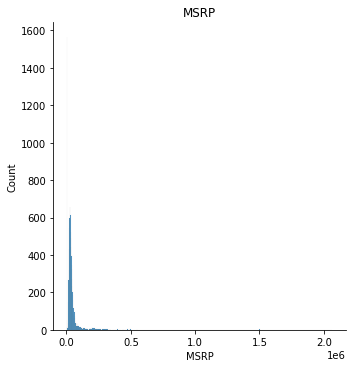

In [ ]:
for col in num_col:
    sns.displot(data[col])
    plt.title(str.upper(col))
    plt.show()
    print('\n')

## <font color = 'blue'>**Handling the outliers and duplicated observations**</font> 


In [ ]:
# Drop usless features
data.drop(['Model','Driven_Wheels','Market Category','Transmission Type'],axis=1,inplace=True)

In [ ]:
def remove_outlier(dfx,column):
    
    Q1 = dfx[column].quantile(0.25)
    Q3 = dfx[column].quantile(0.75)
    
    IQR = Q3-Q1
    low_limit = Q1-1.5*IQR
    upr_limit = Q3+1.5*IQR
    
    df_out = dfx[(dfx[column] > low_limit) & (dfx[column] < upr_limit)]
    
    return df_out

In [ ]:
data_cleaned = pd.DataFrame()

In [ ]:
to_clean = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'MSRP']
for col in to_clean:
    data_cleaned = remove_outlier(data,col)
data_cleaned.shape

(10918, 12)

In [ ]:
data_cleaned.duplicated().sum()

746

In [ ]:
data_cleaned.drop_duplicates(inplace=True )

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


## <font color = 'blue'>**Start working on copy of the**</font> 


In [ ]:
try_data = data_cleaned[:]

In [ ]:
try_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10172 entries, 0 to 11913
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              10172 non-null  object 
 1   Year              10172 non-null  int64  
 2   Engine Fuel Type  10169 non-null  object 
 3   Engine HP         10116 non-null  float64
 4   Engine Cylinders  10142 non-null  float64
 5   Number of Doors   10170 non-null  float64
 6   Vehicle Size      10172 non-null  object 
 7   Vehicle Style     10172 non-null  object 
 8   highway MPG       10172 non-null  int64  
 9   city mpg          10172 non-null  int64  
 10  Popularity        10172 non-null  int64  
 11  MSRP              10172 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 1.0+ MB


In [ ]:
try_data.dropna(inplace=True)

In [ ]:
try_data[['Engine HP','Engine Cylinders','Number of Doors']]=try_data[['Engine HP','Engine Cylinders','Number of Doors']].fillna(try_data[['Engine HP','Engine Cylinders','Number of Doors']].mean())


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
try_data['Engine Fuel Type']=try_data['Engine Fuel Type'].fillna(try_data['Engine Fuel Type'].mode().loc[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
try_data.isnull().sum()

Make                0
Year                0
Engine Fuel Type    0
Engine HP           0
Engine Cylinders    0
Number of Doors     0
Vehicle Size        0
Vehicle Style       0
highway MPG         0
city mpg            0
Popularity          0
MSRP                0
dtype: int64

## <font color = 'blue'>**Encod the categorical data**</font> 


In [ ]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(try_data[['Make','Engine Fuel Type','Vehicle Size','Vehicle Style']]))

OH_cols_train.index = try_data.index

try_data = pd.concat([try_data, OH_cols_train], axis=1)


In [ ]:
try_data.drop(['Make','Engine Fuel Type','Vehicle Size','Vehicle Style'],axis=1,inplace=True)

In [ ]:
try_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10084 entries, 0 to 11913
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              10084 non-null  int64  
 1   Engine HP         10084 non-null  float64
 2   Engine Cylinders  10084 non-null  float64
 3   Number of Doors   10084 non-null  float64
 4   highway MPG       10084 non-null  int64  
 5   city mpg          10084 non-null  int64  
 6   Popularity        10084 non-null  int64  
 7   MSRP              10084 non-null  int64  
 8   0                 10084 non-null  float64
 9   1                 10084 non-null  float64
 10  2                 10084 non-null  float64
 11  3                 10084 non-null  float64
 12  4                 10084 non-null  float64
 13  5                 10084 non-null  float64
 14  6                 10084 non-null  float64
 15  7                 10084 non-null  float64
 16  8                 10084 non-null  float6

In [ ]:
try_data.isnull().sum().to_string()

'Year                0\nEngine HP           0\nEngine Cylinders    0\nNumber of Doors     0\nhighway MPG         0\ncity mpg            0\nPopularity          0\nMSRP                0\n0                   0\n1                   0\n2                   0\n3                   0\n4                   0\n5                   0\n6                   0\n7                   0\n8                   0\n9                   0\n10                  0\n11                  0\n12                  0\n13                  0\n14                  0\n15                  0\n16                  0\n17                  0\n18                  0\n19                  0\n20                  0\n21                  0\n22                  0\n23                  0\n24                  0\n25                  0\n26                  0\n27                  0\n28                  0\n29                  0\n30                  0\n31                  0\n32                  0\n33                  0\n34                  0\n35        

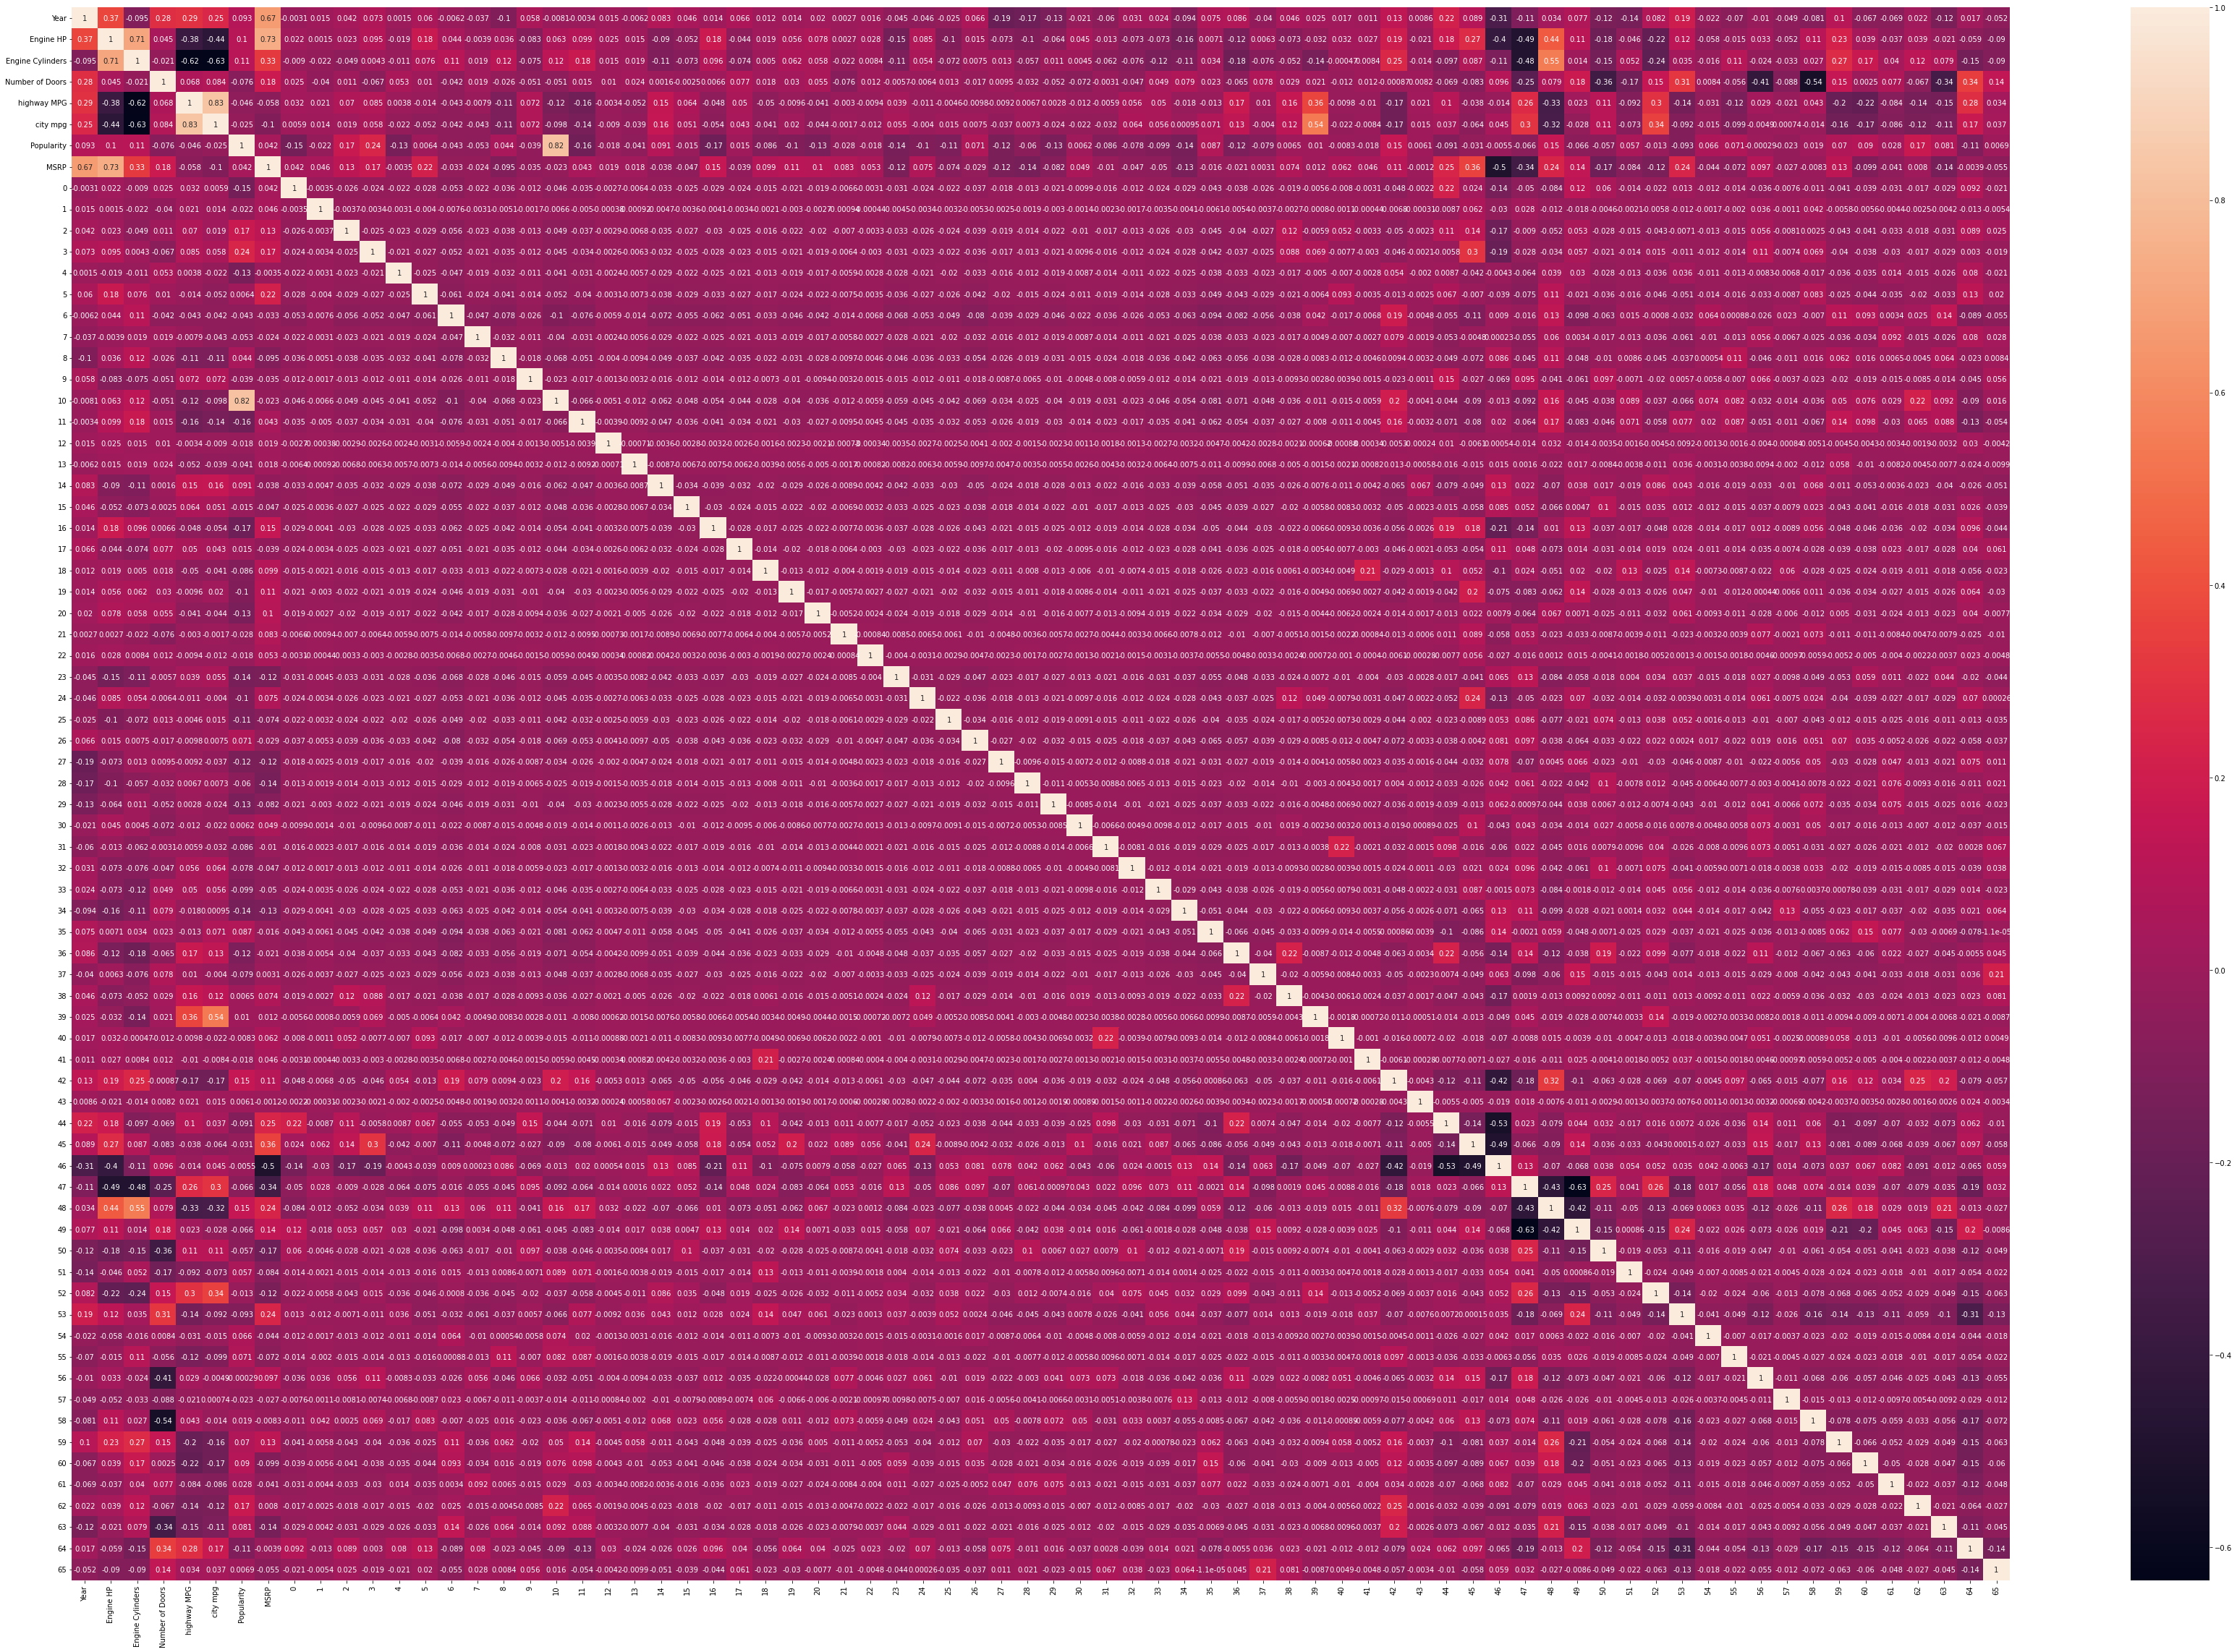

In [ ]:
plt.figure(figsize=(60,40))
sns.heatmap(try_data.corr(),annot=True);

In [ ]:
try_data.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,0,1,...,56,57,58,59,60,61,62,63,64,65
0,2011,335.0,6.0,2.0,26,19,3916,46135,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011,230.0,6.0,2.0,28,18,3916,29450,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <font color = 'blue'>**Splitting the data into training and testing data**</font> 


In [ ]:
y = try_data['MSRP']
x = try_data.drop(['Number of Doors','MSRP'],axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#<font color = 'blue'>**Train the model** </font> 



In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators=1300 ,max_leaf_nodes= 700,random_state=0 )

RFReg.fit(x_train,y_train)
y_pred= RFReg.predict(x_test)


#<font color = 'blue'>**Evaluate the model results** </font> 



In [ ]:
print(mean_absolute_error( y_test, y_pred))

2310.9807290275194


#<font color = 'blue'>**Save the model** </font> 



In [ ]:
import pickle
pickle.dump(RFReg,open('/content/BestModel.pkl','wb') )

 


In [ ]:
RFReg_from_pickle = pickle.load(open('/content/BestModel.pkl','rb'))
y_pred_saved = RFReg_from_pickle.predict(x_test)
print(mean_absolute_error( y_test, y_pred_saved))

2310.9807290275194
